In [47]:
#import all relevant modules
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [25]:
#read in the correct dataset
df = pd.read_csv("crash_data_only_numeric_values.csv")
df.head()

,CRASH_YEAR,NUM_LANES,SPD_LIM,CRASH_SEV_CODE,MULTI_VEH_CODE,HOLIDAY_CODE,LG_REGION_DESC_CODE,JUNCTION_TYPE_CODE,DIRN_ROLE1_DESC_CODE,INTSN_MIDBLOCK_CODE,FLAT_HILL_CODE,ROAD_CURVATURE_CODE,ROAD_MARKINGS_CODE,ROAD_SURFACE_CODE,ROAD_WET_CODE,URBAN_CODE,LIGHT_CODE,STREET_LIGHT_CODE,WEATHER_A_CODE,TRAFFIC_CTRL
0,2000,6,50,0,5,0,1,3,3,0,0,0,5,0,0,1,1,2,0,Traffic Signal
1,2000,2,100,0,2,0,8,4,2,1,0,3,0,0,0,0,0,0,0,Nil
2,2000,3,100,0,2,0,12,4,2,1,0,3,2,0,0,0,2,0,0,Nil
3,2000,2,100,0,2,0,12,4,3,1,0,3,0,0,0,0,0,0,0,Nil
4,2000,2,70,0,2,3,2,3,5,0,0,3,0,0,0,1,1,2,0,Nil


In [59]:
#df.drop('TRAFFIC_CTRL', axis='columns', inplace=True)
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)
#scaled_df.to_csv('scaled_crash_data.csv', index=False)


AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [26]:
#find all columns to consider
for col in df.columns: 
    print("'" + col + "'" + ", ") 

'CRASH_YEAR', 
'NUM_LANES', 
'SPD_LIM', 
'CRASH_SEV_CODE', 
'MULTI_VEH_CODE', 
'HOLIDAY_CODE', 
'LG_REGION_DESC_CODE', 
'JUNCTION_TYPE_CODE', 
'DIRN_ROLE1_DESC_CODE', 
'INTSN_MIDBLOCK_CODE', 
'FLAT_HILL_CODE', 
'ROAD_CURVATURE_CODE', 
'ROAD_MARKINGS_CODE', 
'ROAD_SURFACE_CODE', 
'ROAD_WET_CODE', 
'URBAN_CODE', 
'LIGHT_CODE', 
'STREET_LIGHT_CODE', 
'WEATHER_A_CODE', 
'TRAFFIC_CTRL', 


In [34]:
#create KMeans model
km = KMeans(n_clusters=15)
y_predicted = km.fit_predict(df[['CRASH_YEAR', 
'NUM_LANES', 
'SPD_LIM', 
'CRASH_SEV_CODE', 
'MULTI_VEH_CODE', 
'HOLIDAY_CODE', 
'LG_REGION_DESC_CODE', 
'JUNCTION_TYPE_CODE', 
'DIRN_ROLE1_DESC_CODE', 
'INTSN_MIDBLOCK_CODE', 
'FLAT_HILL_CODE', 
'ROAD_CURVATURE_CODE', 
'ROAD_MARKINGS_CODE', 
'ROAD_SURFACE_CODE', 
'ROAD_WET_CODE', 
'URBAN_CODE', 
'LIGHT_CODE', 
'STREET_LIGHT_CODE', 
'WEATHER_A_CODE']])
y_predicted

array([ 5, 11, 11, ..., 10, 10, 10])

In [36]:
#find cluster centres and add cluster as a column on dataframe
df['CLUSTER']=y_predicted
#df.head()
km.cluster_centers_

array([[ 2.01120326e+03,  3.36965255e+00,  6.00000000e+01,
         1.81323561e+00,  2.67044894e+00,  2.91676651e+00,
         3.42603425e+00,  3.39319191e+00,  2.72499824e+00,
         4.39283952e-01,  8.90126154e-02,  2.51603355e+00,
         2.61082529e+00,  6.90675876e-03,  7.01881739e-01,
         1.00000000e+00,  9.99577137e-01,  2.20522940e+00,
         4.24977095e-01],
       [ 2.01410199e+03,  2.07757070e+00,  9.99712168e+01,
         1.78024034e+00,  4.05077835e+00,  2.86001775e+00,
         1.06701206e+01,  3.75599050e+00,  2.67453407e+00,
         8.56108033e-01,  3.08387901e-01,  1.75505505e+00,
         5.35127486e-01,  1.28157156e-01,  1.02281068e+00,
         1.23678845e-13,  1.11647598e+00,  1.73960807e+00,
         5.95212396e-01],
       [ 2.01497764e+03,  2.45976972e+00,  4.99712723e+01,
         1.81508950e+00,  2.90709838e+00,  2.92393444e+00,
         2.02552305e+00,  3.32231150e+00,  2.68726823e+00,
         5.01247539e-01,  1.54603305e-01,  2.51355125e+00,
    

In [43]:
#Find the sum of squared error for each number of clusters
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['CRASH_YEAR', 'NUM_LANES', 'SPD_LIM', 'CRASH_SEV_CODE', 'MULTI_VEH_CODE', 'HOLIDAY_CODE', 'LG_REGION_DESC_CODE', 'JUNCTION_TYPE_CODE', 'DIRN_ROLE1_DESC_CODE', 'INTSN_MIDBLOCK_CODE', 'FLAT_HILL_CODE', 'ROAD_CURVATURE_CODE', 'ROAD_MARKINGS_CODE', 'ROAD_SURFACE_CODE', 'ROAD_WET_CODE', 'URBAN_CODE', 'LIGHT_CODE', 'STREET_LIGHT_CODE', 'WEATHER_A_CODE']])
    sse.append(km.inertia_)
print("finished")

finished


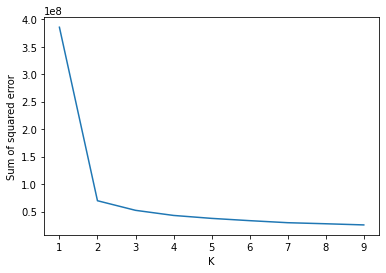

In [44]:
#Plot line graph that shows the sum of squared error for each number of k values
# appropriate number of clusters is at the elbow of the plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)